##**My Chung**

##**MSBI - Spring 2021**

This notebook focuses on processing CoV2 variants data and building a Convolutional Neural Network model to classify different Covid19 variants. 

Signature spike protein was identified by NCBI and virus variants were retrieved from GISAID website using corresponding spike protein. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
from google.colab import files
file = files.upload()

Saving CoV2variant_proteins_labels3.fasta to CoV2variant_proteins_labels3.fasta


In [3]:
pip install Bio

     |████████████████████████████████| 271 kB 30.3 MB/s 
     |████████████████████████████████| 2.3 MB 32.5 MB/s 


In [4]:
from Bio import SeqIO

In [5]:
# read CoV2 variant caller ID and sequences
variant_seqs = []
variant_callerID = []
variant_labels = []
for record in SeqIO.parse('CoV2variant_proteins_labels3.fasta', 'fasta'):
  variant_callerID.append(' '.join(record.id.split('-')[:2]))
  variant_labels.append(record.id.split('-')[-1])
  variant_seqs.append(str(record.seq[:-1]))
  #print(record.seq)

print(variant_callerID[0])
print(variant_labels[0])
print(variant_seqs[0])

B.1.526 MDHP04799
Interest
MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASIEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGGSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVKGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQGVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGVENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAI

In [6]:
len(variant_seqs)

98

In [7]:
# create dataframe for variant sequences
variant_df = pd.DataFrame({'Caller ID': variant_callerID, 'Sequences': variant_seqs, 'Levels': variant_labels})
variant_df.head(4)

,Caller ID,Sequences,Levels
0,B.1.526 MDHP04799,MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Interest
1,B.1.526 CACZB30450,MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Interest
2,B.1.526 ASC210068500,MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Interest
3,B.1.526 QDX24125439,MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Interest


In [8]:
"""trim sequences to the same length"""
min_seq_length = min(variant_df.Sequences.apply(lambda x: len(x)))
# min_seq_length

# trim variant sequences to the minimum length
def trimming(seq):
  # adding X to the end of each seq
  trimmed_seq = seq[:min_seq_length] + 'X'
  return trimmed_seq

variant_df['Trim Sequences'] = variant_df.Sequences.apply(trimming)
variant_df.head(4)

,Caller ID,Sequences,Levels,Trim Sequences
0,B.1.526 MDHP04799,MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Interest,MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
1,B.1.526 CACZB30450,MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Interest,MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
2,B.1.526 ASC210068500,MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Interest,MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
3,B.1.526 QDX24125439,MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Interest,MFVFFVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...


In [ ]:
variant_df.Levels.unique()

array(['Interest', 'Concern', 'Other'], dtype=object)

In [ ]:
variant_df['Trim Sequences'].apply(lambda x: len(x)).unique()

array([1271])

In [ ]:
# view the end of the sequence 
variant_df['Trim Sequences'][0][1170:]

'GINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLX'

In [ ]:
# extract trim sequences
training_seqs = variant_df['Trim Sequences']
training_seqs.tail(4)

94    MFVFLVLLPLVSSQCVNFTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
95    MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
96    MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
97    MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...
Name: Trim Sequences, dtype: object

##**Data Preprocessing**

In [ ]:
"""generate one-hot encoder for input features"""
# encodes a sequence of bases as a sequence of integers
int_encoder = LabelEncoder() 
# converts an array of integers to a sparse matrix in which each sub-list presents an amino acid letter
one_hot_encoder = OneHotEncoder(categories='auto')
input_features = []
for seq in training_seqs:
  int_encoded = int_encoder.fit_transform(list(seq))
  int_encoded = np.array(int_encoded).reshape(-1, 1)
  one_hot_encoded = one_hot_encoder.fit_transform(int_encoded)
  input_features.append(one_hot_encoded.toarray())

# stack sub-lists into an array
input_features = np.stack(input_features) 
print('Sequence 0: ', training_seqs[0][:15])
print('One-hot encoder for the first 15 amino acids in sequence 0: ')
print(input_features)

Sequence 0:  MFVFFVLLPLVSSQC
One-hot encoder for the first 15 amino acids in sequence 0: 
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...


In [ ]:
input_features.shape

(98, 1271, 21)

In [ ]:
"""generate one-hot encoder for input labels"""
one_hot_encoder = OneHotEncoder(categories='auto')
labels = np.array(variant_df['Levels']).reshape(-1,1)
# labels
input_labels = one_hot_encoder.fit_transform(labels).toarray()
input_labels[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
input_labels.shape

(98, 3)

##**Building Convolutional Neural Network Model**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# create training and testing sets
train_seqs, test_seqs, train_labels, test_labels = train_test_split(input_features, input_labels, 
                                                                    test_size=0.20, random_state=42)

In [ ]:
print(train_seqs.shape)
train_seqs[:2]

(78, 1271, 21)


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]])

In [ ]:
print(train_labels.shape)
train_labels[:2]

(78, 3)


array([[1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
test_seqs.shape

(20, 1271, 21)

In [ ]:
test_labels.shape

(20, 3)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential

In [ ]:
"""build CNN model to classify variant sequences"""
# generate a keras sequential model
model = Sequential()
# add different layers to the model
model.add(Conv1D(filters=128, kernel_size=40, input_shape=(train_seqs.shape[1], train_seqs.shape[2])))
model.add(Flatten())
model.add(Dense(210, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 1232, 128)         107648    
_________________________________________________________________
flatten_22 (Flatten)         (None, 157696)            0         
_________________________________________________________________
dense_66 (Dense)             (None, 210)               33116370  
_________________________________________________________________
dropout_22 (Dropout)         (None, 210)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 100)               21100     
_________________________________________________________________
dense_68 (Dense)             (None, 3)                 303       
Total params: 33,245,421
Trainable params: 33,245,421
Non-trainable params: 0
_________________________________________

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

# train the model with a fixed number of epochs (number of iterations on a dataset)
cnn_model = model.fit(train_seqs, train_labels, epochs=28, verbose=2, validation_split=0.25)

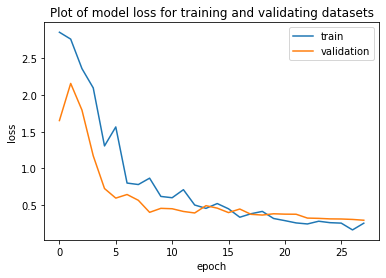

In [ ]:
# visualizing the training and validation loss
plt.figure()
plt.plot(cnn_model.history['loss'])
plt.plot(cnn_model.history['val_loss'])
plt.title('Plot of model loss for training and validating datasets', y=1.07)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

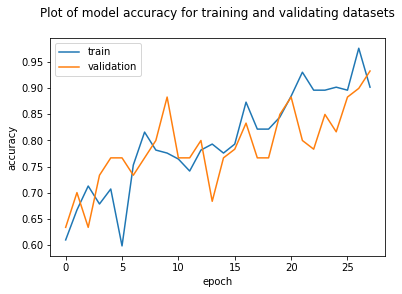

In [ ]:
# visualizing the training and validation accuracy
plt.figure()
plt.plot(cnn_model.history['binary_accuracy'])
plt.plot(cnn_model.history['val_binary_accuracy'])
plt.title('Plot of model accuracy for training and validating datasets', y=1.07)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

##**Model Performance Evaluation**

In [ ]:
from sklearn import metrics
import itertools

In [ ]:
# compute the accuracy of the model
predicted_labels = model.predict(np.stack(test_seqs))
percent_accuracy = metrics.accuracy_score(np.argmax(test_labels, axis=1), np.argmax(predicted_labels, axis=1))
print('percent accuracy of the CNN model: ', percent_accuracy)

percent accuracy of the CNN model:  0.95


Confusion matrix:
 [[ 7  0  0]
 [ 0 10  0]
 [ 0  1  2]]
Normalized Confusion matrix:
 [[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.33333333 0.66666667]]
      Label  Interest   Concern     Other
0  Interest       1.0  0.000000  0.000000
1   Concern       0.0  1.000000  0.000000
2     Other       0.0  0.333333  0.666667


Text(33.0, 0.5, 'True label')

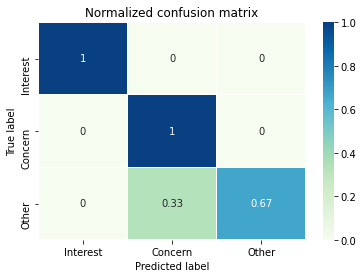

In [ ]:
# confusion matrix
cnn_cm = metrics.confusion_matrix(np.argmax(test_labels, axis=1), 
                      np.argmax(predicted_labels, axis=1))
print('Confusion matrix:\n',cnn_cm)
# normalized confusion matrix
cm_normalized = cnn_cm.astype('float') / cnn_cm.sum(axis = 1)[:, np.newaxis]
print('Normalized Confusion matrix:\n',cm_normalized)
#cm_normalized[0]
df = pd.DataFrame({'Interest': cm_normalized[:, 0], 'Concern': cm_normalized[:, 1], 'Other': cm_normalized[:, 2]})
#df['Label'] = df.
df.insert(0,'Label',['Interest','Concern','Other'],True)
print(df)
# plot normalized confusion matrix
sns.heatmap(df.set_index('Label'), annot=True, cmap='GnBu', linewidths=0.1)
plt.title('Normalized confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')